In [4]:
%load_ext volr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The volr extension is already loaded. To reload it, use:
  %reload_ext volr


# Volr: A declarative interface language for neural computation

## Experimental neural systems modelling with Jupyter Notebooks

Jens Egholm Pedersen ``<xtp778@alumi.ku.dk>``
Christian Pehle ``<christian.pehle@kip.uni-heidelberg.de>``

## Presentation agenda

1. State of the art behavioural experiments in cognitive neuroscience
2. Volr: A declarative DSL
3. Future work

Disclaimer:
* Volr is highly experimental and very susceptible to your input

# Unit for Cognitive Neuroscience

* Founded by prof. Jesper Mogensen in 1980

* Primary research: Plasticity, functional analysis, traumatic brain injury

## Current research

* Effects of hippocampal lesions on allocentric navigation
* Functional effects of brain injuries
* Neural correlates of consciousness (NCC)

## Method of inquiry

<img src="krechevsky.jpg" style="width: 42%; float:right; margin-top: -200px; transform: rotate(-90deg)"/>

1. Train genetically identical rats
2. Introduce lesion
3. Re-train rats
4. Test hypothesis

## Method of inquiry

* Iteration time in the order of months
* Experiments are hard to reproduce with a low validity


* Why not recreate parts of the experiments in simulations?

## Requirements

* Target audience: cognitive neuropsychologists
  * Background in medicine, psychology and cognitive sciences
* Reproducible experiments
* System introspection
* Fast iteration times
* Biological resemblance
  * Simulation and emulation

## Introducing Volr

<img style="float:right; width: 60%" src="volr_model.png" />

Volr is a declarative domain-specific language for the development, evaluation and analysis of neural systems.

* A DSL for building neural systems
* User interface (Jupyter notebook)
* Experiment target integration
  * Input/output protocols

## Why not use Python and work with the NEST API?

* Easy to make experiments in Python
* Build a wrapper around the NEST API with a simple interface
* They will use Python for the data pre- and post processing anyway

But ...
* Python/NEST does not port
  * Artificial neural networks or neuromorphic hardware
* Requires complex object-oriented programming:
  * Hard to maintain with the evolution of NEST
  * Requires proficiency in Python

## Execution targets

<img style="float:right; width: 40%" src="volr_pipeline.png" />

<div style="width: 55%; float:left">
<ul>
    <li>Myelin</br>
  <ul><li>Internal spiking-neural network interpreter</li>
  <li>NEST through NEST API</li>
  <li>BrainScaleS through PyNN</li>
  </ul>
  </li>
  <li>Futhark</br>
  <ul><li>Data-parallel functional language developed in Copenhagen</li>
  <li>Accelerated recurrent artificial networks</li>
  </ul>
</ul>
</div>

## Volr architecture

<img style="float:right; width: 30%" src="volr_detailed.png" />

We chose to build on top of NEST and PyNN:

* Internal algebraic representation of networks
  * Generated specifications from the targets
  * Compile-time verification
  * Extensible to multiple execution targets

## Volr architecture

<img style="float:right; width: 30%" src="volr_detailed.png" />

We chose to build on top of NEST and PyNN:

* Haskell base
  * Connection-set algebra
  * Network composition and calculus

## Volr architecture

<img style="float:right; width: 30%" src="volr_detailed.png" />

We chose to build on top of NEST and PyNN:

* Allows for a simpler 'reasoning'
  * Contributions from linguistics (see <a href="https://julialang.org/blog/2017/12/ml&pl">Innes et al</a>)
* Singular focus: reproducible experiments

## NEST integration

* Highly experimental
* Rudimentary support for complete experiments


* Full support for neuron models
* Regression and integration testing

## Language syntax

<div style="float:right; width: 30%; margin-right: 200px">
<pre>
<b style="color:#901A1E">stimulus</b> s
  input: "data.json"
  
<b style="color:#901A1E">population</b> p
  from p: one to one

<b style="color:#901A1E">response</b>
  from p: all to one

<b style="color:#901A1E">target</b> NEST
  model: izhikevich
 
<b style="color:#901A1E">target</b> BrainScaleS
  model: if_cond_exp
</pre>
</div>

<div style="width:50%; margin-top:50px;">
</br></br>
<ul>
<li>High-level abstractions</li>
<li>Short syntax</li>
<li>Connection-set algebra for concise connectivity descriptions</li>
</ul>
</div>

# 3 small examples

### Example 1: Graphing a single-population network

Results stored in variable `results`


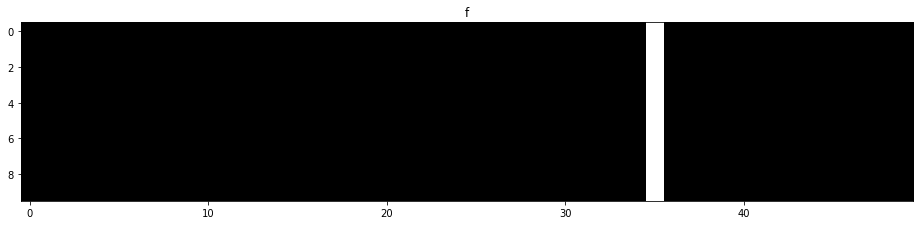

In [3]:
%%volr

stimulus s
  input: [20, 21]
        
population p 
  from s: all to all
  neurons: 10
    
response
  from f

target nest
   runtime: 50

Results stored in variable `results`


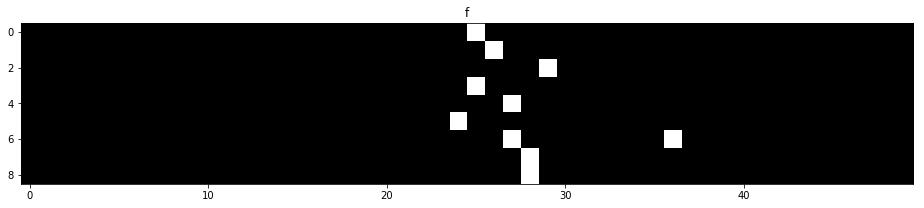

In [18]:
%%volr ssh hel ~/executor.sh wafer

stimulus s
  input: [20, 21]
        
population p
  from s: all to all
  neurons: 10
    
response 
  from p

target brainscales
  wafer: 37
  hicann: 297
  runtime: 50

### Example 2: Python integration

In [4]:
stim_spikes = np.random.normal(loc=25, scale=6, size=8)
stim_spikes.sort()
stim_spikes

array([22.39135043, 23.11702577, 23.19889334, 24.68001389, 24.68183817,
       25.12134284, 26.12572315, 35.85689358])

Results stored in variable `results`


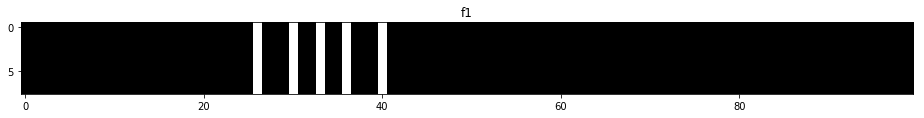

In [6]:
%%volr

stimulus s
  input: $stim_spikes

population p 
  from s: all to all
    weight: 1
  neurons: 8
    
response 
  from f1 

target nest
  runtime: 100

Results stored in variable `results`


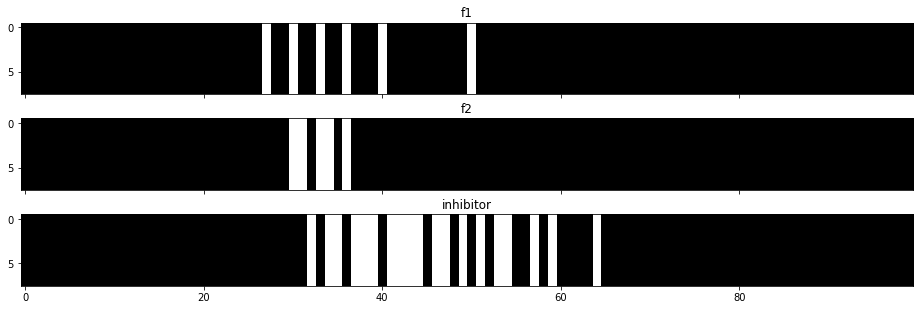

In [9]:
%%volr ssh hel ~/executor.sh

stimulus s
  input: $stim_spikes

population p1
  from s
  neurons: 8
  
population inhibitor 
  from f1: all to all
    weight: 0.5
  neurons: 8
  
population p2 
  from p1
    weight: 1
  from inhibitor 
    weight: -1
  neurons: 8

response from p2

target nest
  runtime: 100

In [6]:
%%volr ssh hel ~/executor.sh wafer

stimulus s
  array: [20, 21]

population p
  from s
    weight: 1
  neurons: 10

response
  from p

target brainscales
  wafer: 37
  hicann: 297
  runtime: 50

command
ssh hel ~/executor.sh wafer
Error sending code to backend


ExecutionException: b''
b'srun: error: Unable to allocate resources: Invalid account or account/partition combination specified\n'

## Conclusion

* Focus: non-programmers can create and run experiments
  * Increased adoption and use of NEST
* Shareable and extendable experiments
  * Faster and simpler to reason about
* Building on previous work


## Future work

* Expansion: Tensorflow, Heidelberg chip 2, SpiNNaker
* Improved integration with Jupyter
  * Introspect currents and spikes
  * Autogenerated plots etc.
* Improved support for detailed parameters
  * Ongoing work 


* Learning-to-learn experiments
* Automatic differentiation and network 'algebra'
* Behavioural and cognitive experiments

## Summary

<div style="float:right; width:50%">
</br></br></br>
Thank you for your time
<ul>
    <li>Jens Egholm Pedersen: <code>xtp778@alumni.ku.dk</code></li>
    <li>Christian Pehle <code>christian.pehle@kip.uni-heidelberg.de</code></li>
</ul>
</div>

* Targeting non-programmers
* Reproducible experiments
* System/experiment introspection
* Fast iteration times


* Working hard on learning